<a href="https://colab.research.google.com/github/Bharatgaur/Email-Spam-Classifier-or-SMS-Spam-Classifier/blob/main/sms_spam_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
# Read the CSV file into a pandas DataFrame with encoding specified
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')

# Display the first few rows of the dataset
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4804,ham,Sorry for the delay. Yes masters,NaN,NaN,NaN
557,ham,I know that my friend already told that.,NaN,NaN,NaN
4981,ham,Slept? I thinkThis time ( &lt;#&gt; pm) is no...,NaN,NaN,NaN
1820,ham,I'll probably be by tomorrow (or even later to...,NaN,NaN,NaN
3954,ham,I knew it... U slept v late yest? Wake up so l...,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

# 1. Data cleaning

# 2. EDA

# 3. Text Preprocessing

# 4. Model building

# 5. Evaluation

# 6. Improvement

# 7. Website

# 8. Deploy

## 1. Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
# drop last 3 cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [7]:
df.sample(5)

,v1,v2
3110,ham,Short But Cute : \ Be a good person
2353,spam,Please CALL 08712402902 immediately as there i...
1898,ham,Wat would u like 4 ur birthday?
242,ham,"Okay. No no, just shining on. That was meant t..."
4228,ham,Have you bookedthe hut? And also your time off...


In [8]:
# renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
1831,ham,Hello- thanx for taking that call. I got a job...
3215,spam,URGENT! We are trying to contact U. Todays dra...
1789,ham,Takin a shower now but yeah I'll leave when I'...
3140,ham,Customer place i will call you
1084,ham,For me the love should start with attraction.i...


The `LabelEncoder` from `sklearn.preprocessing` is used to convert categorical labels (i.e., non-numeric data) into numeric values. This is important because machine learning models typically work better with numeric data, and many algorithms require features to be numeric.

Here's why and how it is used:

### Why we use `LabelEncoder`:
1. **Converting categorical values to numerical**: Many datasets contain categorical data (e.g., "spam" and "ham" in a spam classifier). Machine learning models cannot work with these textual labels directly, so `LabelEncoder` helps transform these categories into numeric labels.
2. **Simplifies text-based classification problems**: In problems like email or SMS spam classification, labels such as "spam" and "ham" need to be represented as `0` or `1` so the model can process them.
3. **Handling target variables**: Often used to encode the target variable (y) in classification tasks, where you need to map text-based categories to numerical labels.

### Example of how it is used:

```python
from sklearn.preprocessing import LabelEncoder

# Sample data
categories = ['spam', 'ham', 'ham', 'spam', 'ham']

# Initialize the encoder
encoder = LabelEncoder()

# Fit the encoder to the data and transform the categories into numeric labels
encoded_labels = encoder.fit_transform(categories)

# Display the encoded labels
print(encoded_labels)
```

### Output:
```
[1 0 0 1 0]
```

In this example:
- "spam" has been encoded as `1`
- "ham" has been encoded as `0`

### When to use it:
- When you have a categorical feature (or target variable) that needs to be transformed into a numeric format before feeding it to a machine learning model.
- When dealing with target labels for classification tasks in NLP (natural language processing), sentiment analysis, or any kind of categorization problem.

In [9]:
from sklearn.preprocessing import LabelEncoder
ecoder = LabelEncoder()

In [10]:
df['target'] = ecoder.fit_transform(df['target'])

In [11]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
# Missing values
df.isnull().sum()

,0
target,0
text,0


In [13]:
# check for duplicate values
df.duplicated().sum()

403

In [14]:
# removing duplicated values
df = df.drop_duplicates(keep='first')

In [15]:
df.duplicated().sum()

0

In [16]:
df.shape

(5169, 2)

## 2.EDA

In [17]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [18]:
df.value_counts('target')

,count
target,
0,4516
1,653


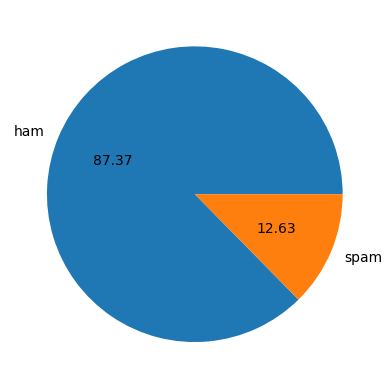

In [19]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct="%0.2f")
plt.show()

In [ ]:
# Data is imbalanced

In [ ]:
!pip install nltk

In [20]:
import nltk

In [21]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [22]:
df['text'].apply(len)

,text
0,111
1,29
2,155
3,49
4,61
...,...
5567,161
5568,37
5569,57
5570,125


In [23]:
df['num_characters'] = df['text'].apply(len)

In [24]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [25]:
# num of words
df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

,text
0,24
1,8
2,37
3,13
4,15
...,...
5567,35
5568,9
5569,15
5570,27


In [26]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [27]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [28]:
df['text'].apply(lambda x:nltk.word_tokenize(x))

,text
0,"[Go, until, jurong, point, ,, crazy, .., Avail..."
1,"[Ok, lar, ..., Joking, wif, u, oni, ...]"
2,"[Free, entry, in, 2, a, wkly, comp, to, win, F..."
3,"[U, dun, say, so, early, hor, ..., U, c, alrea..."
4,"[Nah, I, do, n't, think, he, goes, to, usf, ,,..."
...,...
5567,"[This, is, the, 2nd, time, we, have, tried, 2,..."
5568,"[Will, Ì_, b, going, to, esplanade, fr, home, ?]"
5569,"[Pity, ,, *, was, in, mood, for, that, ., So, ..."
5570,"[The, guy, did, some, bitching, but, I, acted,..."


In [29]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [30]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [31]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [32]:
# ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [33]:
# spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [34]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

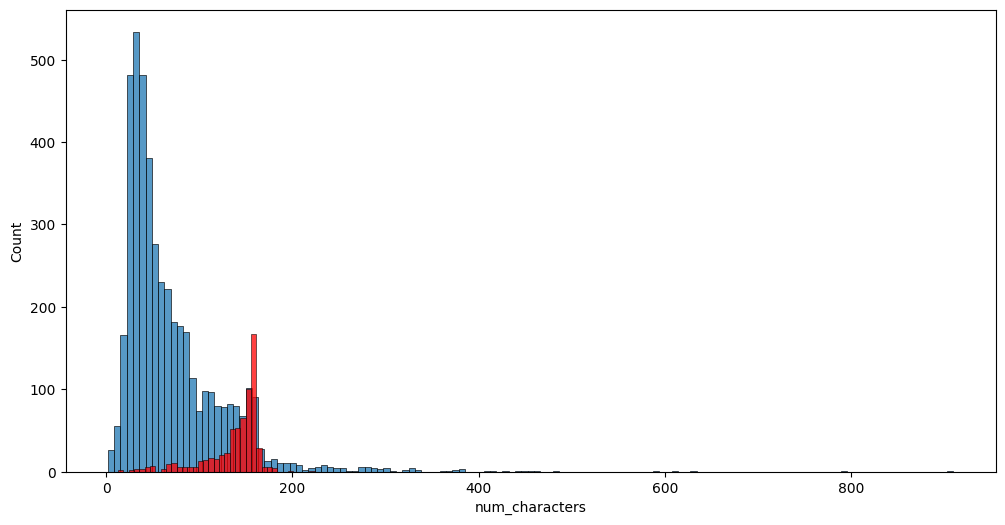

In [35]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

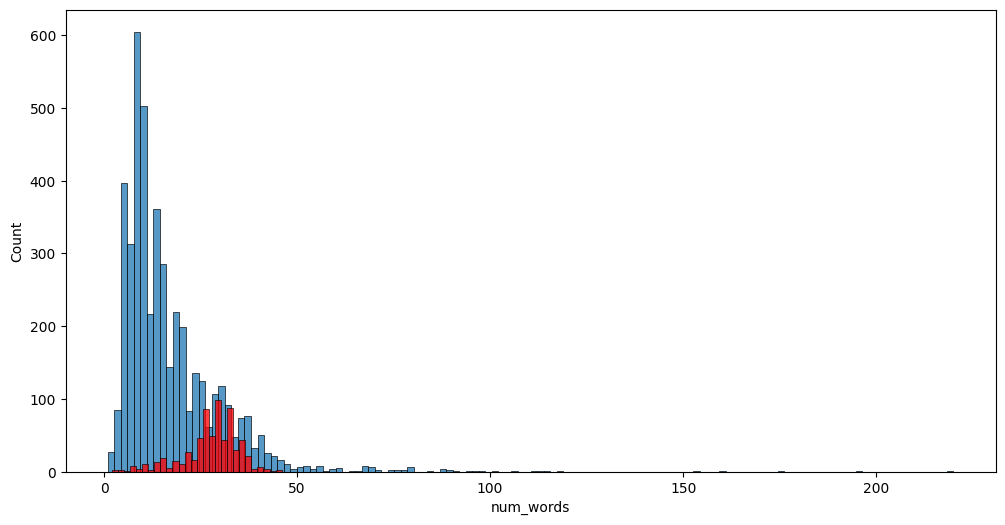

In [36]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

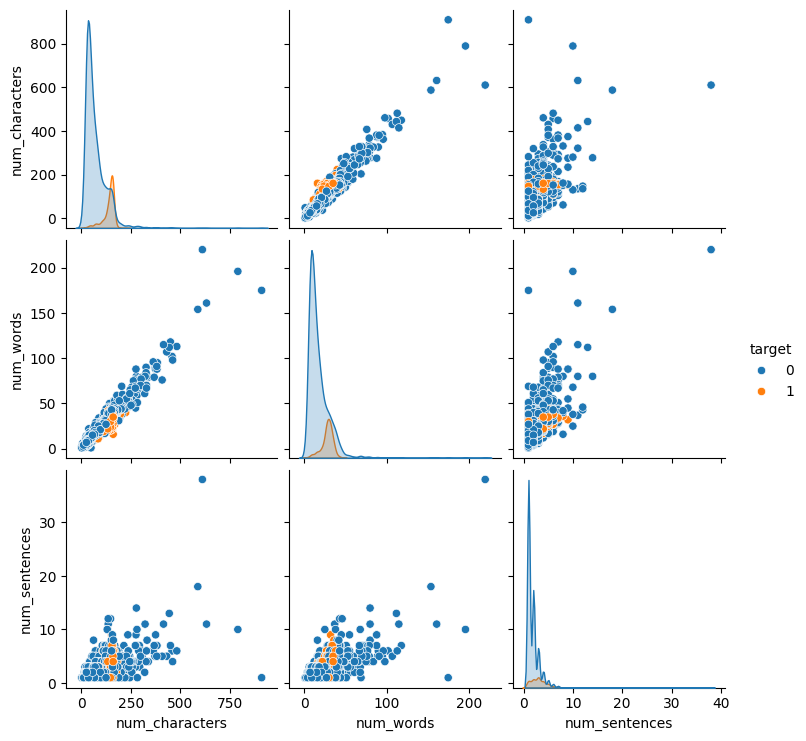

In [37]:
sns.pairplot(df,hue='target')

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

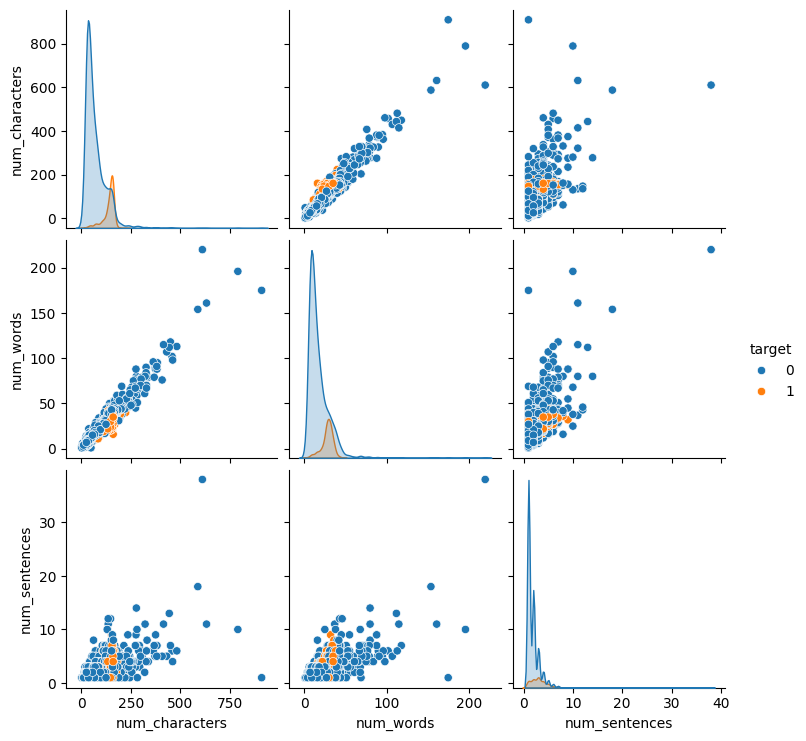

In [38]:
sns.pairplot(df,hue='target')

<AxesSubplot:>

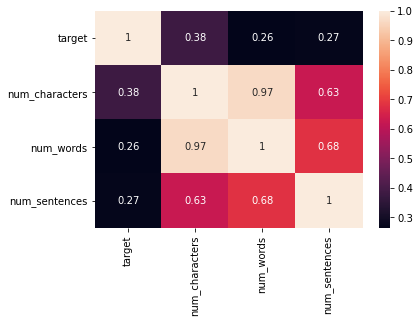

In [ ]:
# sns.heatmap(df.corr(),annot=True)

## 3. Data Preprocessing
- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming

In [41]:
def transform_text(text):
    text = text.lower()
    return text

In [42]:
transform_text("Hi hi DKFHKSDFG SDKFUKIGHSD HSDJKFGHUSD text")

'hi hi dkfhksdfg sdkfukighsd hsdjkfghusd text'

In [43]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    return text

In [44]:
transform_text("Hi hi DKFHKSDFG SDKFUKIGHSD HSDJKFGHUSD text")

['hi', 'hi', 'dkfhksdfg', 'sdkfukighsd', 'hsdjkfghusd', 'text']

In [48]:
df['text'][100]

'Okay name ur price as long as its legal! Wen can I pick them up? Y u ave x ams xx'

In [49]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
      if i.isalnum():
        y.append(i)
    return text

In [51]:
transform_text("Hi hi DKFHKSDFG SDghjfgjh2000020 2000%%%% HSD HSDJKFGHUSD text")

['hi',
 'hi',
 'dkfhksdfg',
 'sdghjfgjh2000020',
 '2000',
 '%',
 '%',
 '%',
 '%',
 'hsd',
 'hsdjkfghusd',
 'text']

In [52]:
from nltk.corpus import stopwords
stopwords.words('english')

LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - '/root/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


In [54]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [55]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [56]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
      if i.isalnum():
        y.append(i)

    text = y
    y.clear()
    return y

In [57]:
transform_text("Hi hi DKFHKSDFG SDghjfgjh2000020 2000%%%% HSD HSDJKFGHUSD text")

[]

In [58]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
      if i.isalnum():
        y.append(i)

    text = y
    y.clear()
    for i in text:
      if i not in stopwords.words('english') and i not in string.punctuation:
        y.append(i)
    return y

In [60]:
transform_text("Hi how are you Bharat?")

[]

In [61]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
      if i.isalnum():
        y.append(i)

    text = y[:]
    y.clear()
    for i in text:
      if i not in stopwords.words('english') and i not in string.punctuation:
        y.append(i)
    return y

In [62]:
transform_text("Hi how are you Bharat?")

['hi', 'bharat']

In [63]:
transform_text("Did you like my sath?")

['like', 'sath']

In [66]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('dancing')

'danc'

In [73]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
      if i.isalnum():
        y.append(i)

    text = y[:]
    y.clear()

    for i in text:
      if i not in stopwords.words('english') and i not in string.punctuation:
        y.append(i)
    text = y[:]
    y.clear()
    for i in text:
      y.append(ps.stem(i))

    return " ".join(y)

In [74]:
transform_text("I love the youtube tutorial on machine learning about AI")

'love youtub tutori machin learn ai'

In [75]:
df['text'][2000]

"But i'll b going 2 sch on mon. My sis need 2 take smth."

In [76]:
transform_text("But i'll b going 2 sch on mon. My sis need 2 take smth.")

'b go 2 sch mon si need 2 take smth'

In [77]:
transform_text(df['text'][2000])

'b go 2 sch mon si need 2 take smth'

In [78]:
transform_text(df['text'][2500])

'rememb ask alex pizza'

In [79]:
df['text'].apply(transform_text)

,text
0,go jurong point crazi avail bugi n great world...
1,ok lar joke wif u oni
2,free entri 2 wkli comp win fa cup final tkt 21...
3,u dun say earli hor u c alreadi say
4,nah think goe usf live around though
...,...
5567,2nd time tri 2 contact u pound prize 2 claim e...
5568,b go esplanad fr home
5569,piti mood suggest
5570,guy bitch act like interest buy someth els nex...


In [80]:
df['transformed_text'] = df['text'].apply(transform_text)

In [81]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [83]:
from wordcloud import wordcloud
wc = wordcloud.WordCloud(width=500,height=500,min_font_size=10,background_color='white')


In [85]:
wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

In [86]:
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

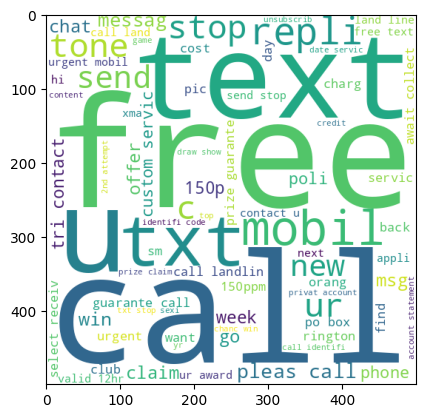

In [87]:
plt.imshow(spam_wc)

In [88]:
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

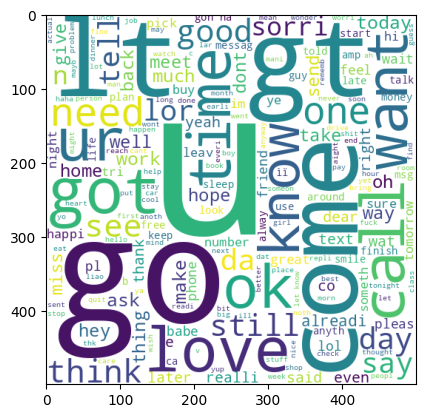

In [89]:
plt.imshow(ham_wc)

In [90]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [91]:
for msg in df[df['target']==1]['transformed_text'].tolist():
  print(msg)

free entri 2 wkli comp win fa cup final tkt 21st may text fa 87121 receiv entri question std txt rate c appli 08452810075over18
freemsg hey darl 3 week word back like fun still tb ok xxx std chg send rcv
winner valu network custom select receivea prize reward claim call claim code kl341 valid 12 hour
mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030
six chanc win cash 100 pound txt csh11 send cost 6day tsandc appli repli hl 4 info
urgent 1 week free membership prize jackpot txt word claim 81010 c lccltd pobox 4403ldnw1a7rw18
xxxmobilemovieclub use credit click wap link next txt messag click http
england v macedonia dont miss news txt ur nation team 87077 eg england 87077 tri wale scotland poboxox36504w45wq
thank subscript rington uk mobil charg pleas confirm repli ye repli charg
07732584351 rodger burn msg tri call repli sm free nokia mobil free camcord pleas call 08000930705 deliveri tomorrow
sm ac sptv new jersey devil detroit red wi

In [93]:
spam_corpus = []
for msg in df[df['target']==1]['transformed_text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)

In [94]:
spam_corpus

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 '4403ldnw

In [95]:
len(spam_corpus)

9939

In [96]:
from collections import Counter
Counter(spam_corpus)

Counter({'free': 191,
         'entri': 21,
         '2': 155,
         'wkli': 9,
         'comp': 8,
         'win': 48,
         'fa': 2,
         'cup': 3,
         'final': 14,
         'tkt': 2,
         '21st': 1,
         'may': 6,
         'text': 122,
         '87121': 2,
         'receiv': 31,
         'question': 9,
         'std': 6,
         'txt': 141,
         'rate': 26,
         'c': 45,
         'appli': 24,
         '08452810075over18': 1,
         'freemsg': 14,
         'hey': 5,
         'darl': 2,
         '3': 20,
         'week': 49,
         'word': 21,
         'back': 20,
         'like': 12,
         'fun': 8,
         'still': 5,
         'tb': 1,
         'ok': 5,
         'xxx': 10,
         'chg': 2,
         'send': 60,
         'rcv': 2,
         'winner': 13,
         'valu': 8,
         'network': 26,
         'custom': 42,
         'select': 26,
         'receivea': 1,
         'prize': 82,
         'reward': 9,
         'claim': 98,
         'cal

In [97]:
from collections import Counter
pd.DataFrame(Counter(spam_corpus).most_common(30))

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


In [ ]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
      if i.isalnum():
        y.append(i)
    return text

In [98]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])

TypeError: barplot() takes from 0 to 1 positional arguments but 2 were given

<Axes: xlabel='Word', ylabel='Count'>

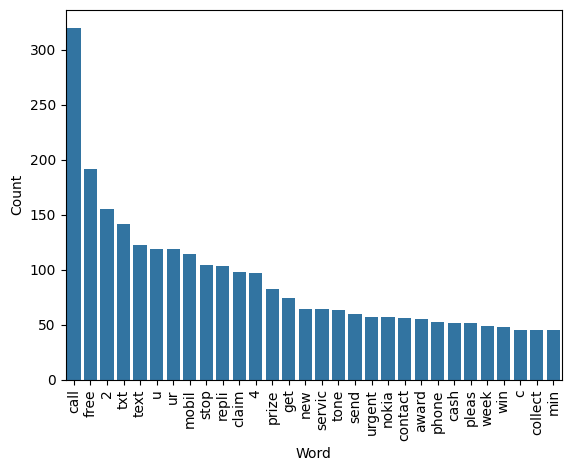

In [100]:
from collections import Counter
import pandas as pd
import seaborn as sns

# Get the 30 most common items
common_items = Counter(spam_corpus).most_common(30)

# Convert to DataFrame
df_common = pd.DataFrame(common_items, columns=['Word', 'Count'])
plt.xticks(rotation='vertical')
# Plot using seaborn
sns.barplot(x='Word', y='Count', data=df_common)

In [103]:
ham_corpus = []
for msg in df[df['target']==0]['transformed_text'].tolist():
  for word in msg.split():
    ham_corpus.append(word)

<Axes: xlabel='Word', ylabel='Count'>

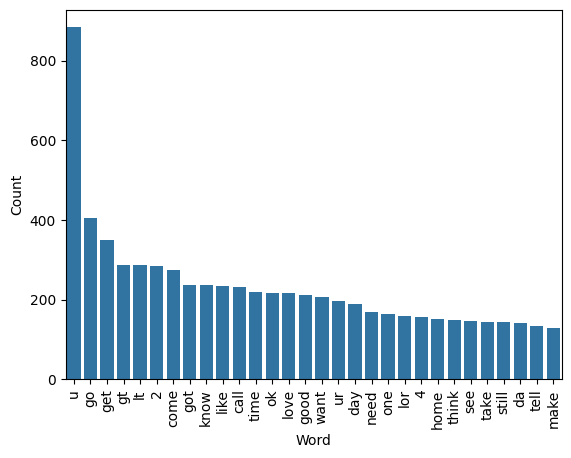

In [105]:
from collections import Counter
import pandas as pd
import seaborn as sns

# Get the 30 most common items
common_items2 = Counter(ham_corpus).most_common(30)

# Convert to DataFrame
df_common2 = pd.DataFrame(common_items2, columns=['Word', 'Count'])
plt.xticks(rotation='vertical')
# Plot using seaborn
sns.barplot(x='Word', y='Count', data=df_common2)

In [106]:
len(ham_corpus)

35404

In [39]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))


    return " ".join(y)

In [40]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

NameError: name 'stopwords' is not defined

In [ ]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [ ]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [ ]:
df['transformed_text'] = df['text'].apply(transform_text)

In [ ]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [ ]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

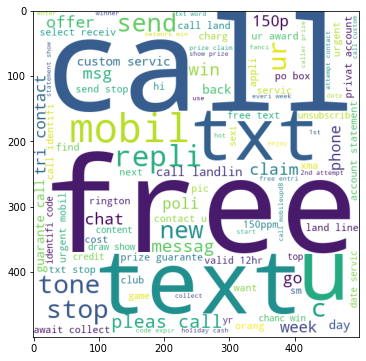

In [ ]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [ ]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

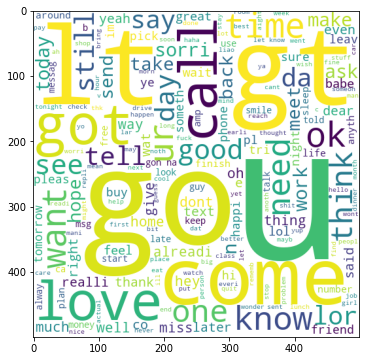

In [ ]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [ ]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)


In [ ]:
len(spam_corpus)

9941

C:\Users\91842\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


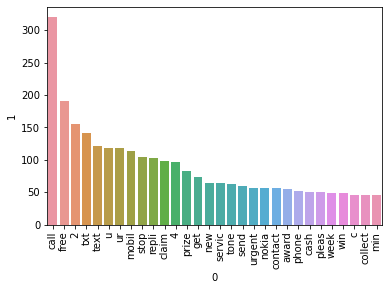

In [ ]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [ ]:
len(ham_corpus)

35303

C:\Users\91842\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


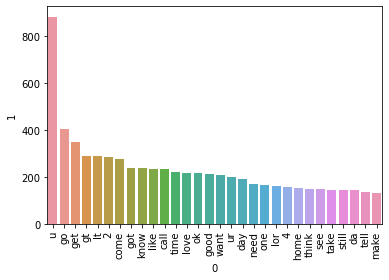

In [ ]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
# Text Vectorization
# using Bag of Words
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


## 4. Model Building

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [ ]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [ ]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)

In [ ]:
# appending the num_character col to X
#X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [ ]:
X.shape

(5169, 3000)

In [ ]:
y = df['target'].values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [ ]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [ ]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8916827852998066
[[808  88]
 [ 24 114]]
0.5643564356435643


In [ ]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.971953578336557
[[896   0]
 [ 29 109]]
1.0


In [ ]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [ ]:
# tfidf --> MNB

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [ ]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [ ]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [ ]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [ ]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9729206963249516, 0.9741379310344828)

In [ ]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

C:\Users\91842\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For  SVC
Accuracy -  0.8665377176015474
Precision -  0.0
For  KN
Accuracy -  0.9284332688588007
Precision -  0.7711864406779662
For  NB
Accuracy -  0.9400386847195358
Precision -  1.0
For  DT
Accuracy -  0.9439071566731141
Precision -  0.8773584905660378
For  LR
Accuracy -  0.9613152804642167
Precision -  0.9711538461538461
For  RF
Accuracy -  0.9748549323017408
Precision -  0.9827586206896551
For  AdaBoost
Accuracy -  0.971953578336557
Precision -  0.9504132231404959
For  BgC
Accuracy -  0.9680851063829787
Precision -  0.9133858267716536
For  ETC
Accuracy -  0.97678916827853
Precision -  0.975
For  GBDT
Accuracy -  0.9487427466150871
Precision -  0.9292929292929293


C:\Users\91842\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:16:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
For  xgb
Accuracy -  0.9700193423597679
Precision -  0.9421487603305785


In [ ]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [ ]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.900387,1.000000
2,NB,0.959381,1.000000
8,ETC,0.977756,0.991453
5,RF,0.970019,0.990826
0,SVC,0.972921,0.974138
6,AdaBoost,0.962282,0.954128
10,xgb,0.971954,0.950413
4,LR,0.951644,0.940000
9,GBDT,0.951644,0.931373
7,BgC,0.957447,0.861538


In [ ]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [ ]:
performance_df1

,Algorithm,variable,value
0,ETC,Accuracy,0.977756
1,SVC,Accuracy,0.972921
2,xgb,Accuracy,0.971954
3,RF,Accuracy,0.970019
4,AdaBoost,Accuracy,0.962282
5,NB,Accuracy,0.959381
6,BgC,Accuracy,0.957447
7,LR,Accuracy,0.951644
8,GBDT,Accuracy,0.951644
9,DT,Accuracy,0.935203


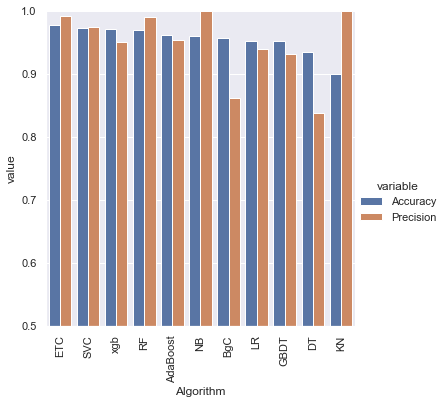

In [ ]:
sns.catplot(x = 'Algorithm', y='value',
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
# model improve
# 1. Change the max_features parameter of TfIdf

In [ ]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [ ]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [ ]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [ ]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [ ]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [ ]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000,Accuracy_scaling,Precision_scaling,Accuracy_num_chars,Precision_num_chars
0,KN,0.900387,1.000000,0.905222,1.000000,0.905222,0.976190,0.928433,0.771186
1,NB,0.959381,1.000000,0.971954,1.000000,0.978723,0.946154,0.940039,1.000000
2,ETC,0.977756,0.991453,0.979691,0.975610,0.979691,0.975610,0.976789,0.975000
3,RF,0.970019,0.990826,0.975822,0.982906,0.975822,0.982906,0.974855,0.982759
4,SVC,0.972921,0.974138,0.974855,0.974576,0.971954,0.943089,0.866538,0.000000
5,AdaBoost,0.962282,0.954128,0.961315,0.945455,0.961315,0.945455,0.971954,0.950413
6,xgb,0.971954,0.950413,0.968085,0.933884,0.968085,0.933884,0.970019,0.942149
7,LR,0.951644,0.940000,0.956480,0.969697,0.967118,0.964286,0.961315,0.971154
8,GBDT,0.951644,0.931373,0.946809,0.927835,0.946809,0.927835,0.948743,0.929293
9,BgC,0.957447,0.861538,0.959381,0.869231,0.959381,0.869231,0.968085,0.913386


In [ ]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [ ]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [ ]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [ ]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9816247582205029
Precision 0.9917355371900827


In [ ]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [ ]:
from sklearn.ensemble import StackingClassifier

In [ ]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [ ]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9787234042553191
Precision 0.9328358208955224


In [ ]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))